## Settings

In [2]:
import sys
sys.path.append("..")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from inputs.funcs import load_data

In [5]:
train_x, train_y, test_x = load_data()
train_df = pd.concat([train_x, train_y], axis=1)

In [6]:
train_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


## train_x vs test_x

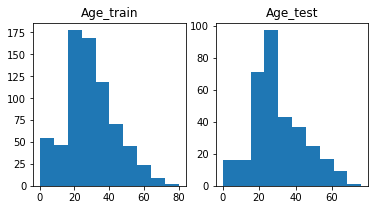

In [6]:
# Age
_, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Age_train')
axes[0].hist(train_x['Age'])
axes[1].set_title('Age_test')
axes[1].hist(test_x['Age'])
plt.show()

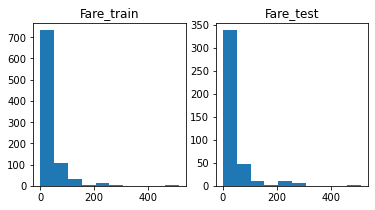

In [7]:
# Fare
_, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Fare_train')
axes[0].hist(train_x['Fare'])
axes[1].set_title('Fare_test')
axes[1].hist(test_x['Fare'])
plt.show()

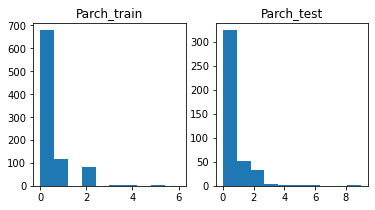

In [8]:
# Parch
_, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Parch_train')
axes[0].hist(train_x['Parch'])
axes[1].set_title('Parch_test')
axes[1].hist(test_x['Parch'])
plt.show()

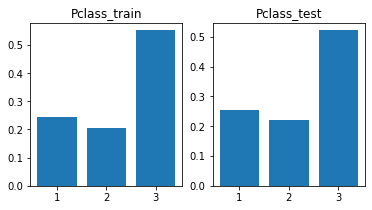

In [9]:
# Pclass
pclass_train = train_x.groupby('Pclass').size() / len(train_x)
pclass_test = test_x.groupby('Pclass').size() / len(test_x)

_, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Pclass_train')
axes[0].bar(pclass_train.index, pclass_train)
axes[1].set_title('Pclass_test')
axes[1].bar(pclass_test.index, pclass_test)
plt.show()

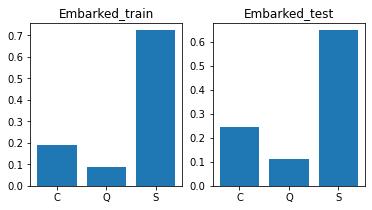

In [10]:
# embarked
embarked_train = train_x.groupby('Embarked').size() / len(train_x)
embarked_test = test_x.groupby('Embarked').size() / len(test_x)

_, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Embarked_train')
axes[0].bar(embarked_train.index, embarked_train)
axes[1].set_title('Embarked_test')
axes[1].bar(embarked_test.index, embarked_test)
plt.show()

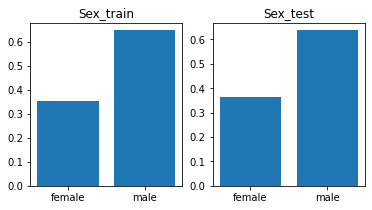

In [11]:
# sex
sex_train = train_x.groupby('Sex').size() / len(train_x)
sex_test = test_x.groupby('Sex').size() / len(test_x)

_, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Sex_train')
axes[0].bar(sex_train.index, sex_train)
axes[1].set_title('Sex_test')
axes[1].bar(sex_test.index, sex_test)
plt.show()

## train_x

In [17]:
train_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


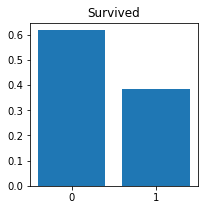

In [12]:
survived = train_df.groupby('Survived').size() / len(train_df)
plt.figure(figsize=(3,3))
plt.bar([str(index) for index in survived.index], survived)
plt.title('Survived')
plt.show()

### Pclass

In [21]:
df = train_df
df_0 = df[df['Survived'] == 0]
df_1 = df[df['Survived'] == 1]

In [22]:
pclass_0 = df_0.groupby('Pclass').size() / len(df_0)
pclass_1 = df_1.groupby('Pclass').size() / len(df_1)

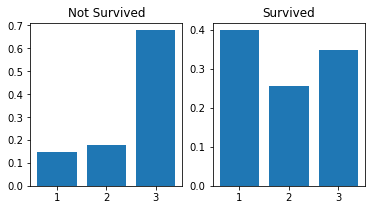

In [23]:
_, axes = plt.subplots(1,2,figsize=(6,3))
axes[0].bar(pclass_0.index, pclass_0)
axes[0].set_title('Not Survived')
axes[1].bar(pclass_1.index, pclass_1)
axes[1].set_title('Survived')
plt.show()

### Sex

In [24]:
df = train_df
df_0 = df[df['Survived'] == 0]
df_1 = df[df['Survived'] == 1]

In [25]:
sex_0 = df_0.groupby('Sex').size() / len(df_0)
sex_1 = df_1.groupby('Sex').size() / len(df_1)

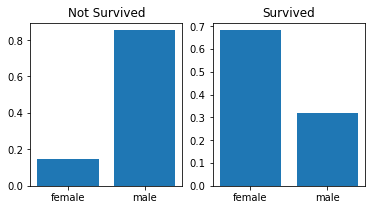

In [26]:
_, axes = plt.subplots(1,2,figsize=(6,3))
axes[0].bar(sex_0.index, sex_0)
axes[0].set_title('Not Survived')
axes[1].bar(sex_1.index, sex_1)
axes[1].set_title('Survived')
plt.show()

### Age

In [13]:
df = train_df
df_0 = df[df['Survived'] == 0].copy()
df_1 = df[df['Survived'] == 1].copy()

In [14]:
df_0['AgeGroup'] = df_0['Age'].apply(lambda x: int(x/10)*10 if not np.isnan(x) else x)
df_1['AgeGroup'] = df_1['Age'].apply(lambda x: int(x/10)*10 if not np.isnan(x) else x)

In [15]:
age_0 = df_0.groupby('AgeGroup').size() / len(df_0)
age_1 = df_1.groupby('AgeGroup').size() / len(df_1)

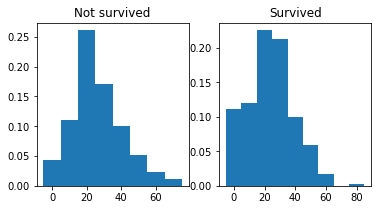

In [16]:
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Not survived')
axes[0].bar(age_0.index, age_0, width=10)
axes[1].set_title('Survived')
axes[1].bar(age_1.index, age_1, width=10)
plt.show()

In [17]:
# bins = list(range(0, int(df['Age'].max())+10, 10))
# fig, axes = plt.subplots(1,2, figsize=(6,3))
# axes[0].set_title('Not survived')
# axes[0].hist(df_0['Age'], bins=bins)
# axes[0].set_xlim(-3, df['Age'].max()+3)
# axes[1].set_title('Survived')
# axes[1].hist(df_1['Age'], bins=bins)
# axes[1].set_xlim(-3, df['Age'].max()+3)
# plt.show()

### SibSp

In [7]:
df = train_df
df_0 = df[df['Survived'] == 0].copy()
df_1 = df[df['Survived'] == 1].copy()

In [8]:
sibsp_0 = df_0.groupby('SibSp').size() / len(df_0)
sibsp_1 = df_1.groupby('SibSp').size() / len(df_1)

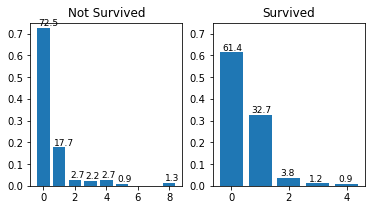

In [24]:
_, axes = plt.subplots(1,2,figsize=(6,3))
axes[0].bar(sibsp_0.index, sibsp_0)
axes[0].set_title('Not Survived')
axes[0].set_ylim(0, 0.75)
for sibsp, rate in zip(sibsp_0.index, sibsp_0):
    axes[0].text(sibsp-0.3, rate+0.01, f'{100*rate:.1f}', fontsize=9)
axes[1].bar(sibsp_1.index, sibsp_1)
axes[1].set_title('Survived')
axes[1].set_ylim(0, 0.75)
for sibsp, rate in zip(sibsp_1.index, sibsp_1):
    axes[1].text(sibsp-0.3, rate+0.01, f'{100*rate:.1f}', fontsize=9)
plt.show()

### Parch

In [29]:
df = train_df
df_0 = df[df['Survived'] == 0].copy()
df_1 = df[df['Survived'] == 1].copy()

In [30]:
parch_0 = df_0.groupby('Parch').size() / len(df_0)
parch_1 = df_1.groupby('Parch').size() / len(df_1)

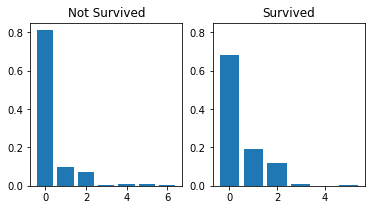

In [57]:
_, axes = plt.subplots(1,2,figsize=(6,3))
axes[0].bar(parch_0.index, parch_0)
axes[0].set_title('Not Survived')
axes[0].set_ylim(0, 0.85)
axes[1].bar(parch_1.index, parch_1)
axes[1].set_title('Survived')
axes[1].set_ylim(0, 0.85)
plt.show()

In [54]:
parch_s = df.groupby(['Parch', 'Survived']).size().to_frame('size').reset_index()
parch_t = df.groupby('Parch').size().to_frame('total').reset_index()

In [55]:
parch = pd.merge(parch_s, parch_t, on='Parch')
parch['rate'] = parch['size'] / parch['total']
parch

,Parch,Survived,size,total,rate
0,0,0,445,678,0.656342
1,0,1,233,678,0.343658
2,1,0,53,118,0.449153
3,1,1,65,118,0.550847
4,2,0,40,80,0.500000
5,2,1,40,80,0.500000
6,3,0,2,5,0.400000
7,3,1,3,5,0.600000
8,4,0,4,4,1.000000
9,5,0,4,5,0.800000


### Ticket

In [18]:
train_df['Ticket'].apply(lambda x: x[:2]).value_counts().sort_values(ascending=False).head()

34    132
11     88
PC     60
26     60
36     46
Name: Ticket, dtype: int64

### Fare

In [27]:
df = train_df
df_0 = df[df['Survived'] == 0].copy()
df_1 = df[df['Survived'] == 1].copy()

In [28]:
df_0['FareGroup'] = df_0['Fare'].apply(lambda x: int(x/10)*10 if not np.isnan(x) else 0)
df_1['FareGroup'] = df_1['Fare'].apply(lambda x: int(x/10)*10 if not np.isnan(x) else 0)

In [29]:
fare_0 = df_0.groupby('FareGroup').size() / len(df_0)
fare_1 = df_1.groupby('FareGroup').size() / len(df_1)

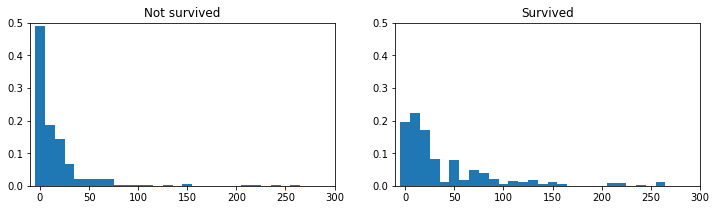

In [30]:
fig, axes = plt.subplots(1,2, figsize=(12,3))
axes[0].set_title('Not survived')
axes[0].bar(fare_0.index, fare_0, width=10)
axes[0].set_xlim(-10, 300)
axes[0].set_ylim(0, 0.5)
axes[1].set_title('Survived')
axes[1].bar(fare_1.index, fare_1, width=10)
axes[1].set_xlim(-10, 300)
axes[1].set_ylim(0, 0.5)
plt.show()

### Cabin

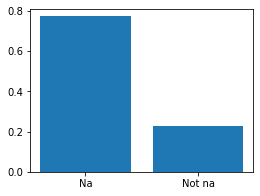

In [31]:
cabin_na_rate = train_df['Cabin'].isna().sum() / len(train_df)
cabin_non_na_rate = 1 - cabin_na_rate
plt.figure(figsize=(4,3))
plt.bar(['Na', 'Not na'], [cabin_na_rate, cabin_non_na_rate])
plt.show()

In [32]:
cabin_df = train_df['Cabin'].dropna()
cabin_df[cabin_df.apply(lambda x: True if len(x) > 4 else False)].reset_index(drop=True).unique()

array(['C23 C25 C27', 'F G73', 'D10 D12', 'B58 B60', 'F E69', 'C22 C26',
       'B57 B59 B63 B66', 'B96 B98', 'B51 B53 B55', 'F G63', 'C62 C64',
       'B82 B84'], dtype=object)

In [33]:
cabin_df.dropna().apply(lambda x: x[0]).unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [34]:
df = train_df
df_0 = df[df['Survived'] == 0].copy()
df_1 = df[df['Survived'] == 1].copy()

In [35]:
df_0['Cabin_first'] = df_0['Cabin'].apply(lambda x: 'Z' if type(x) == float and np.isnan(x) else x[0])
df_1['Cabin_first'] = df_1['Cabin'].apply(lambda x: 'Z' if type(x) == float and np.isnan(x) else x[0])

In [36]:
cabin_0 = df_0.groupby('Cabin_first').size() / len(df_0)
cabin_1 = df_1.groupby('Cabin_first').size() / len(df_1)

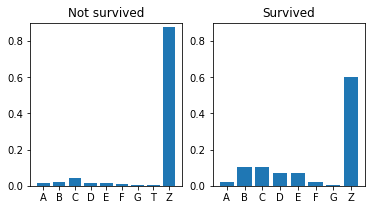

In [37]:
fig, axes = plt.subplots(1,2, figsize=(6,3))
axes[0].set_title('Not survived')
axes[0].bar(cabin_0.index, cabin_0)
axes[0].set_ylim(0, 0.9)
axes[1].set_title('Survived')
axes[1].bar(cabin_1.index, cabin_1)
axes[1].set_ylim(0, 0.9)
plt.show()

In [14]:
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

### Embarked

In [18]:
df = train_df
df_0 = df[df['Survived'] == 0]
df_1 = df[df['Survived'] == 1]

In [19]:
embarked_0 = df_0.groupby('Embarked').size() / len(df_0)
embarked_1 = df_1.groupby('Embarked').size() / len(df_1)

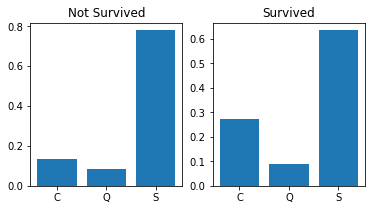

In [20]:
_, axes = plt.subplots(1,2,figsize=(6,3))
axes[0].bar(embarked_0.index, embarked_0)
axes[0].set_title('Not Survived')
axes[1].bar(embarked_1.index, embarked_1)
axes[1].set_title('Survived')
plt.show()